# Load MNIST dataset & One Hot Encording 

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

!pip install tensorflow==2.7.0
#!pip install tensorflow-gpu

In [ ]:
'''%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))'''

"%tensorflow_version 2.x\nimport tensorflow as tf\ndevice_name = tf.test.gpu_device_name()\nif device_name != '/device:GPU:0':\n  raise SystemError('GPU device not found')\nprint('Found GPU at: {}'.format(device_name))"

In [ ]:
tf.__version__

'2.7.0'

In [ ]:
'''gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)'''

'gpus = tf.config.experimental.list_physical_devices(\'GPU\')\nif gpus:\n    try:\n        # Currently, memory growth needs to be the same across GPUs\n        for gpu in gpus:\n            tf.config.experimental.set_memory_growth(gpu, True)\n        logical_gpus = tf.config.experimental.list_logical_devices(\'GPU\')\n        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")\n    except RuntimeError as e:\n        # Memory growth must be set before GPUs have been initialized\n        print(e)'

In [ ]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


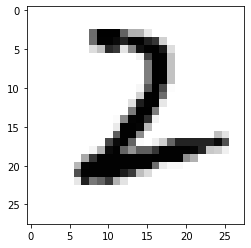

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train[410], cmap = 'Greys')
plt.show()

In [ ]:
import sys
for x in X_train[410]:
  for i in x:
    sys.stdout.write("%d\t" % i)
  sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	165	254	254	254	175	106	105	43	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	164	253	253	246	225	253	253	227	211	72	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	58	89	221	210	48	141	241	253	254	232	58	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	24	204	254	253	89	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	149	254	253	89	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	149	254	253	89	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	149	254	253	89	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	16	186	255	196	5	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	72	253	254	166	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	54	229	253	254	44	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	152	254	254	150	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	8	139	251	253	217	26	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	39	

In [ ]:
X_train = X_train.reshape(60000, 28,28,1).astype('float64') / 255
X_test = X_test.reshape(10000, 28,28,1).astype('float64') / 255

In [ ]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
'''from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout,Flatten
import os
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping

with tf.device('/device:GPU:0'):
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
  model.add(Conv2D(64, (3,3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = 2))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation = 'softmax'))


  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

  Dir = './model/'
  if not os.path.exists(Dir):
    os.mkdir(Dir)

  modelpath = "./model/{epoch:02d} - {val_loss:.4f}.hdf5"
  checkpointer =ModelCheckpoint(filepath = modelpath, monital = 'val_loss', verbose = 1, save_best_only= True)
  early = EarlyStopping(monitor = 'val_loss', patience = 5)


  history = model.fit(X_train, y_train, validation_data = (X_test, y_test),epochs = 30, batch_size = 200, verbose = 0, callbacks = [early, checkpointer])
  print('\nAccuracy : {:.4f}'.format(model.evaluate(X_test, y_test)[1]))
'''
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout,Flatten
import os
from keras.callbacks import ModelCheckpoint, EarlyStopping


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))


model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Dir = './model/'
if not os.path.exists(Dir):
  os.mkdir(Dir)
modelpath = "./model/{epoch:02d} - {val_loss:.4f}.hdf5"

checkpointer =ModelCheckpoint(filepath = modelpath, monital = 'val_loss', verbose = 1, save_best_only= True)
early = EarlyStopping(monitor = 'val_loss', patience = 5)


history = model.fit(X_train, y_train, validation_data = (X_test, y_test),epochs = 30, batch_size = 200, verbose = 0, callbacks = [early, checkpointer])
print('\nAccuracy : {:.4f}'.format(model.evaluate(X_test, y_test)[1]))




Epoch 00001: val_loss improved from inf to 0.05844, saving model to ./model/01 - 0.0584.hdf5

Epoch 00002: val_loss improved from 0.05844 to 0.04265, saving model to ./model/02 - 0.0426.hdf5

Epoch 00003: val_loss improved from 0.04265 to 0.03652, saving model to ./model/03 - 0.0365.hdf5

Epoch 00004: val_loss improved from 0.03652 to 0.03219, saving model to ./model/04 - 0.0322.hdf5

Epoch 00005: val_loss did not improve from 0.03219

Epoch 00006: val_loss improved from 0.03219 to 0.02836, saving model to ./model/06 - 0.0284.hdf5

Epoch 00007: val_loss did not improve from 0.02836

Epoch 00008: val_loss did not improve from 0.02836

Epoch 00009: val_loss improved from 0.02836 to 0.02782, saving model to ./model/09 - 0.0278.hdf5

Epoch 00010: val_loss improved from 0.02782 to 0.02758, saving model to ./model/10 - 0.0276.hdf5

Epoch 00011: val_loss did not improve from 0.02758

Epoch 00012: val_loss did not improve from 0.02758

Epoch 00013: val_loss improved from 0.02758 to 0.02678, s

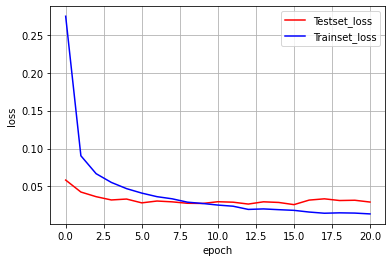

In [ ]:
y_vloss = history.history['val_loss']
y_acc = history.history['loss']

x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, c = 'red', markersize = 3,label = 'Testset_loss')
plt.plot(x_len, y_acc, c = 'blue', markersize = 3,label = 'Trainset_loss')
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()